# Tarea 4. Construyendo la frontera de mínima varianza para dos activos.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/08/Pareto_Efficient_Frontier_for_the_Markowitz_Portfolio_selection_problem..png" width="600px" height="400px" />

**Resumen.**
> En esta tarea, construirás la frontera de mínima varianza para dos activos riesgosos usando los datos de mercados internacionales que usamos en la clase 10.

> Construirás portafolios que consisten de dos activos riesgosos, graficarás la frontera de mínima varianza y encontrarás el portafolio de mínima varianza. Repetirás luego el ejercicio para otro par de activos y compararás los beneficios de diversificación en cada caso.

> Por favor, revisar la clase 10 para los datos. 

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea5_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea5_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Copiar y pegar los datos de rendimientos esperados, volatilidades y correlaciones de mercados internacionales brindados en la Clase 9.

1. Mostrar los DataFrame con los datos (5 puntos).
2. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (5 puntos).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Bajamos los ETF de yahoo
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
#Importamos los datos de yahoo Finance
tickers = ['VOO', 'NAFTRAC.MX']
start_date = '2015-01-01'


St = yf.download(tickers, start=start_date)['Close']
St.head()
rt = St.pct_change().dropna()
St

[*********************100%%**********************]  2 of 2 completed


,NAFTRAC.MX,VOO
Date,,
2015-01-02,42.090000,188.399994
2015-01-05,41.049999,185.089996
2015-01-06,41.310001,183.270004
2015-01-07,41.810001,185.559998
2015-01-08,42.410000,188.820007
...,...,...
2023-09-21,51.660000,397.920013
2023-09-22,51.500000,396.959991
2023-09-25,51.259998,398.609985


In [3]:
#los rendimientos esperados y la volatilidad 
df_one_portafolio = pd.DataFrame()
df_one_portafolio['expected_value'] = rt.mean() * 252
df_one_portafolio['volatility'] = rt.std() * 252**0.5
df_one_portafolio

,expected_value,volatility
NAFTRAC.MX,0.033945,0.155059
VOO,0.101306,0.184222


In [4]:
#Matriz de correlacion 
rt.corr()

,NAFTRAC.MX,VOO
NAFTRAC.MX,1.000000,0.509885
VOO,0.509885,1.000000


Text(0, 0.5, 'Expected value')

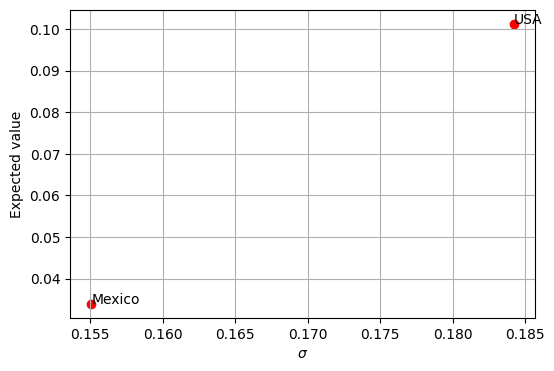

In [5]:
# Inversión en el 100% de los activos
plt.figure(figsize =(6, 4))
plt.scatter(df_one_portafolio.volatility, df_one_portafolio.expected_value, c="r")
plt.text(df_one_portafolio.volatility[0], df_one_portafolio.expected_value[0], 'Mexico')
plt.text(df_one_portafolio.volatility[1], df_one_portafolio.expected_value[1], 'USA')
plt.grid()
plt.xlabel("$\sigma$")
plt.ylabel("Expected value")

In [6]:
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [7]:
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


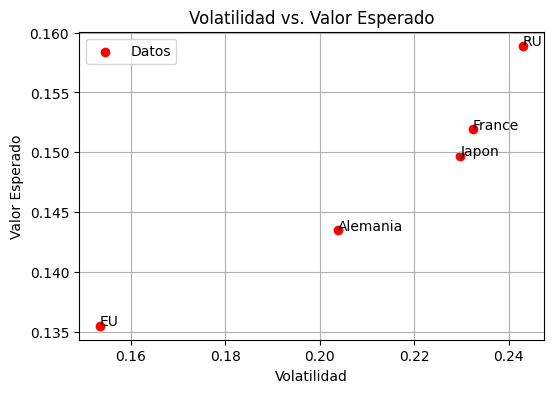

In [8]:
# Obtener los valores de volatilidad y valor esperado
volatilidad = annual_ret_summ.loc['Volatilidad'].values
valor_esperado = annual_ret_summ.loc['Media'].values

# Crear el gráfico de dispersión
plt.figure(figsize=(6, 4))
plt.scatter(volatilidad, valor_esperado, c='red', marker='o', label='Datos')
plt.text(volatilidad[0], valor_esperado[0], 'EU')
plt.text(volatilidad[1], valor_esperado[1], 'RU')
plt.text(volatilidad[2], valor_esperado[2], 'France')
plt.text(volatilidad[3], valor_esperado[3], 'Alemania')
plt.text(volatilidad[4], valor_esperado[4], 'Japon')
plt.title('Volatilidad vs. Valor Esperado')
plt.xlabel('Volatilidad')
plt.ylabel('Valor Esperado')
plt.grid(True)
plt.legend()
plt.show()



## 2. Portafolios con Japón y Reino Unido (30 puntos)

Usando los datos del punto anterior:

1. Construya la frontera de mínima varianza que representa las posibles combinaciones de portafolios que se pueden crear con los mercados Japoneses y del Reino Unido como activos riesgosos. Puedes pensar en ellos como índices de mercado. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [9]:
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [10]:
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


In [11]:
e_ja = annual_ret_summ.loc['Media']['Japon']
e_ru = annual_ret_summ.loc['Media']['RU']

sd_ja = annual_ret_summ.loc['Volatilidad']['Japon']
sd_ru =  annual_ret_summ.loc['Volatilidad']['RU']

corr_ja_ru = corr.values[1][4]

covariance_ru_jp = corr_ja_ru * sd_ja * sd_ru


In [12]:
e_ru

0.1589

In [13]:
corr_ja_ru

0.3581

In [14]:
#Pongo los pesos para el portafolio 
N = 101
w = np.linspace(0, 1, N)


In [15]:
por_ja_ru = pd.DataFrame({
    'w_ru':  w,
    'w_jp':  1 - w, 
    'media':  w*e_ru + (1-w) * e_ja,
    'vol':  np.sqrt(w**2 * sd_ru**2 + (1-w)**2 * sd_ja**2 +  covariance_ru_jp*w*(1-w))

})
por_ja_ru

,w_ru,w_jp,media,vol
0,0.00,1.00,0.149700,0.229800
1,0.01,0.99,0.149792,0.227950
2,0.02,0.98,0.149884,0.226125
3,0.03,0.97,0.149976,0.224326
4,0.04,0.96,0.150068,0.222554
...,...,...,...,...
96,0.96,0.04,0.158532,0.235100
97,0.97,0.03,0.158624,0.237041
98,0.98,0.02,0.158716,0.239006
99,0.99,0.01,0.158808,0.240992


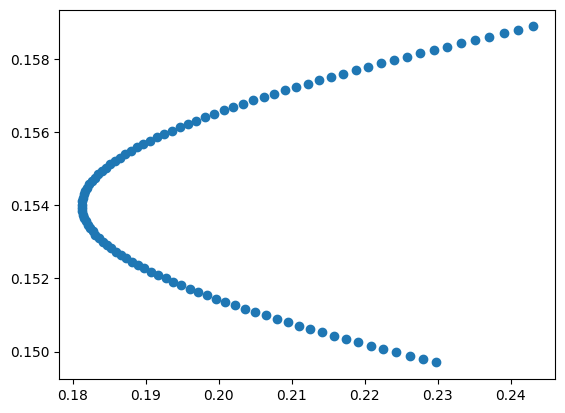

In [16]:
plt.scatter(por_ja_ru.vol, por_ja_ru.media)

In [17]:
min_var = por_ja_ru[por_ja_ru.vol == por_ja_ru.vol.min()]
min_var

,w_ru,w_jp,media,vol
47,0.47,0.53,0.154024,0.18127


## 3. Mismos activos, distinta correlación (30 puntos)

En este punto se usarán los mismos activos (Japón y Reino Unido) con sus rendimientos esperados y volatilidades, solo que supondremos que el coeficiente de correlación entre sus rendimiento es de 0.5.

1. Nuevamente, construya la frontera de mínima varianza para estos dos activos con el nuevo supuesto de correlación. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [18]:
e_ja = annual_ret_summ.loc['Media']['Japon']
e_ru = annual_ret_summ.loc['Media']['RU']

sd_ja = annual_ret_summ.loc['Volatilidad']['Japon']
sd_ru =  annual_ret_summ.loc['Volatilidad']['RU']

corr_ja_ru = 0.5
covariance_ru_jp = corr_ja_ru * sd_ja * sd_ru

N = 101
w = np.linspace(0, 1, N)



In [19]:
por_ja_ru_2 = pd.DataFrame({
    'w_ru':  w,
    'w_jp':  1 - w, 
    'media':  w*e_ru + (1-w) * e_ja,
    'vol':  np.sqrt(w**2 * sd_ru**2 + (1-w)**2 * sd_ja**2 +  covariance_ru_jp*w*(1-w))

})
por_ja_ru


,w_ru,w_jp,media,vol
0,0.00,1.00,0.149700,0.229800
1,0.01,0.99,0.149792,0.227950
2,0.02,0.98,0.149884,0.226125
3,0.03,0.97,0.149976,0.224326
4,0.04,0.96,0.150068,0.222554
...,...,...,...,...
96,0.96,0.04,0.158532,0.235100
97,0.97,0.03,0.158624,0.237041
98,0.98,0.02,0.158716,0.239006
99,0.99,0.01,0.158808,0.240992


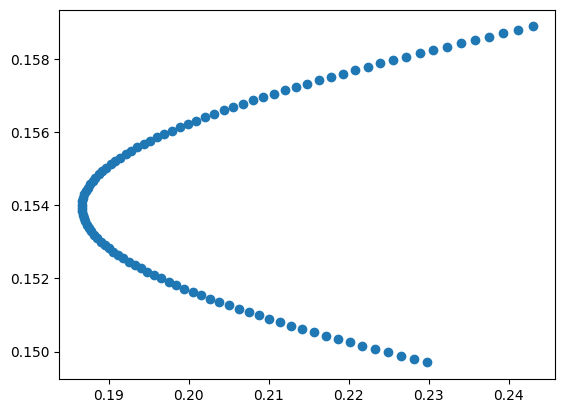

In [20]:
plt.scatter(por_ja_ru_2.vol, por_ja_ru_2.media)

In [21]:
min_var_2 = por_ja_ru_2[por_ja_ru_2.vol == por_ja_ru_2.vol.min()]
min_var_2

,w_ru,w_jp,media,vol
46,0.46,0.54,0.153932,0.186626


## 4. Gráficos y conclusiones (30 puntos)

1. Usando sus respuestas para los puntos 2 y 3, grafique las dos fronteras encontradas en una sola gráfica, además de los puntos correspondientes a los activos individuales, donde el eje $x$ es la volatilidad y el eje $y$ el rendimiento esperado. Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Concluya acerca de la gráfica de las dos fronteras de mínima varianza. ¿Cuál provee más diversificación?, ¿cómo se diferencian?, ¿son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?, ¿cómo puede explicar esta diferencia? (15 puntos).

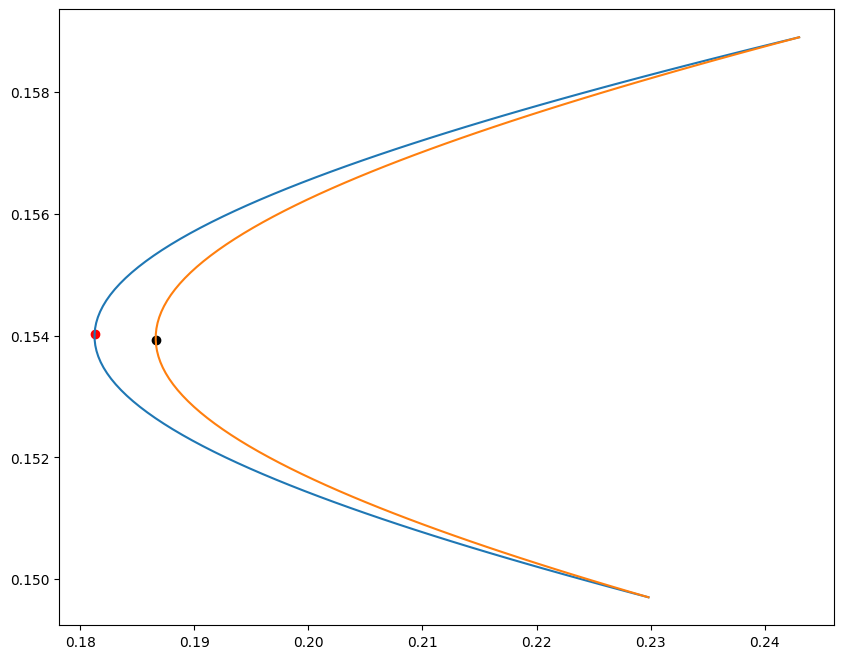

In [22]:
import matplotlib.pyplot as plt

# Tus datos y gráficos existentes
plt.figure(figsize=(10, 8))
plt.plot(por_ja_ru.vol, por_ja_ru.media, label="Portafolio 1")
plt.plot(por_ja_ru_2.vol, por_ja_ru_2.media, label="Portafolio con corr 0.5")
plt.scatter(min_var.vol, min_var.media, label="Minima varianza 1", c='r')
plt.scatter(min_var_2.vol, min_var_2.media, label="Minima varianza 2", c='black')





# Conclusiones 

- El segundo portafolio que contiene una correlacion de 0.5, esta mas diversificado, debido a que se pueden ver cambios mayormente distribuidos. Eso es bastante bueno porque como se puede ver puedes obtener un portafolio con una volatilidad todavia menor que da practicamente el mismo rendimiento. 

- Sus diferencias son minimas, ya que lo unico que cambia es la correlacion, pero esto le da al portafolio dos un menor riesgo, ya que el movimiento de los precios es menor.

- Pues al cambiar la correlacion, se cambian la manera en la que interactuan los datos uno con otro. De hecho, segun un articulo que vi en internet: Cuando cambia la correlación entre activos en un portafolio, esto afecta la estructura de riesgo y rendimiento del portafolio, lo que puede llevar a cambios en los pesos óptimos de los activos

## 5. Frontera y portafolio de mínima varianza con los 5 índices de mercado (Bonus, 20 puntos del examen)

Usando los datos del punto 1:

1. Construya la frontera de mínima varianza para los portafolios que se pueden crear con todos los índices de mercado. Puedes pensar en ellos como índices de mercado. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame.
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza?.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>